<a href="https://colab.research.google.com/github/Romal27/DSGP-24-Retina94/blob/component-1/SVMClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Accuracy:  0.992
Prediction is: NF


<function matplotlib.pyplot.show(close=None, block=None)>

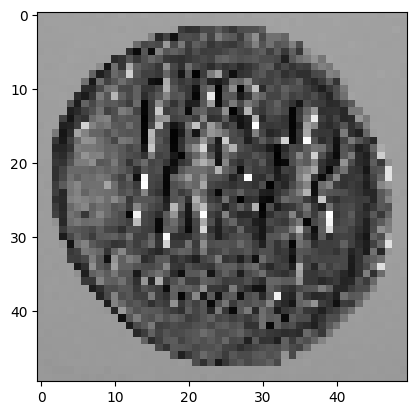

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# # Specify the directory containing the subdirectories with images
# dir = '/content/drive/My Drive/DSGP/Data'  # Adjust this path to your folder

# # Define the categories (subfolders)
# categories = ['F', 'NF']  # Ensure these match the actual folder names in your Google Drive

# data = []

# # List of acceptable image extensions
# valid_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']

# # Loop through each category folder
# for category in categories:
#     path = os.path.join(dir, category)
#     label = categories.index(category)

#     if not os.path.exists(path):  # Check if the path exists
#         print(f"Path does not exist: {path}")
#         continue  # Skip to the next category if the path doesn't exist

#     # Loop through all the files in the category folder
#     for img in os.listdir(path):
#         imgpath = os.path.join(path, img)  # Get the full path to the image

#         # Skip non-image files based on extension
#         if not any(img.lower().endswith(ext) for ext in valid_extensions):
#             continue

#         data_img = cv2.imread(imgpath, 0)  # Read the image as grayscale

#         if data_img is None:
#             print(f"Failed to load image: {imgpath}")  # Add a message if the image couldn't be loaded
#             continue  # Skip to the next image if the current one can't be loaded

#         try:
#             data_img = cv2.resize(data_img, (50, 50))  # Resize the image to 50x50
#             image = np.array(data_img).flatten()  # Flatten the image

#             data.append([image, label])
#         except Exception as e:
#             print(f"Error processing image {imgpath}: {e}")  # Print out any resizing errors
#             pass

# print(f"Total images processed: {len(data)}")
# pick_in = open('/content/drive/My Drive/data1.pickle', 'wb')  # Save directly to Google Drive
# pickle.dump(data, pick_in)
# pick_in.close()


pick_in = open('/content/drive/My Drive/data1.pickle','rb')
data = pickle.load(pick_in)
pick_in.close

random.shuffle(data)
features = []
labels = []

for feature,label in data:
  features.append(feature)
  labels.append(label)

xtrain,xtest,ytrain,ytest = train_test_split(features,labels,test_size=0.5) # For lesser computational time


# model = SVC(C =1,kernel ='poly',gamma = 'auto')
# model.fit(xtrain,ytrain)

# pick = open('/content/drive/My Drive/model.sav', 'wb')
# pickle.dump(model,pick)
pick = open('/content/drive/My Drive/model.sav','rb') # for demostration
model = pickle.load(pick)
pick.close()

prediction = model.predict(xtest)

accuracy = model.score(xtest,ytest)
categories = ['F', 'NF']
print('Accuracy: ', accuracy)
print('Prediction is:',categories[prediction[0]])

mydata = xtest[0].reshape(50,50)
plt.imshow(mydata,cmap='gray')
plt.show



Total images processed: 6998
Accuracy: 0.96


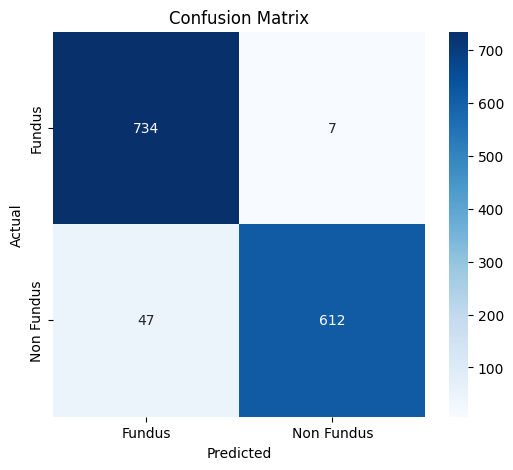

Classification Report:
              precision    recall  f1-score   support

      Fundus       0.94      0.99      0.96       741
  Non Fundus       0.99      0.93      0.96       659

    accuracy                           0.96      1400
   macro avg       0.96      0.96      0.96      1400
weighted avg       0.96      0.96      0.96      1400



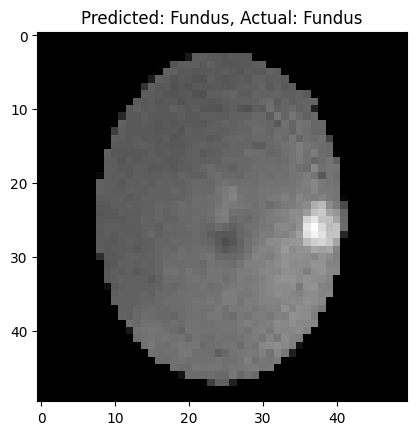

In [9]:
import os
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# Define the directory containing the images
data_dir = "D:/data1"  # Update this path as needed

# Define the categories (subfolders)
categories = ["Fundus", "Non Fundus"]  # Ensure these match the actual folder names

data = []
valid_extensions = [".jpg", ".jpeg", ".png", ".bmp", ".tiff"]  # Acceptable image formats

# Load and preprocess images
for category in categories:
    path = os.path.join(data_dir, category)
    label = categories.index(category)

    if not os.path.exists(path):
        print(f"Path does not exist: {path}")
        continue

    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        if not any(img.lower().endswith(ext) for ext in valid_extensions):
            continue

        data_img = cv2.imread(img_path, 0)  # Read as grayscale
        if data_img is None:
            print(f"Failed to load image: {img_path}")
            continue

        try:
            data_img = cv2.resize(data_img, (50, 50))  # Resize image to 50x50
            image = np.array(data_img).flatten()  # Flatten image
            data.append([image, label])
        except Exception as e:
            print(f"Error processing image {img_path}: {e}")
            pass

print(f"Total images processed: {len(data)}")

# Shuffle data
random.shuffle(data)

# Separate features and labels
features = [item[0] for item in data]
labels = [item[1] for item in data]

# Split data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train SVM model
model = SVC(C=1, kernel="poly", gamma="auto")
model.fit(xtrain, ytrain)

# Predictions
ypred = model.predict(xtest)

# Model accuracy
accuracy = model.score(xtest, ytest)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(ytest, ypred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(ytest, ypred, target_names=categories))

# Display an example image with prediction
index = random.randint(0, len(xtest) - 1)
plt.imshow(np.array(xtest[index]).reshape(50, 50), cmap="gray")
plt.title(f"Predicted: {categories[ypred[index]]}, Actual: {categories[ytest[index]]}")
plt.show()


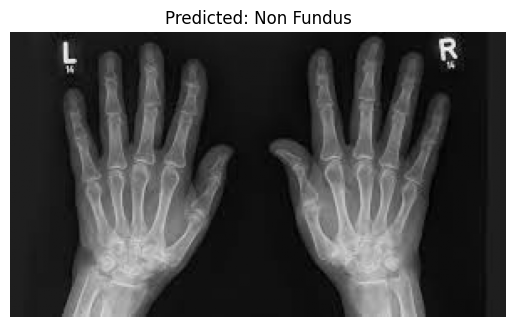

🔍 Predicted Class: Non Fundus


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the categories (subfolders)
categories = ["Fundus", "Non Fundus"]  # Ensure these match the training labels

# Load the trained SVM model
model = SVC(C=1, kernel="poly", gamma="auto")  # Define the same model structure
model.fit(xtrain, ytrain)  # Train it again (only needed if the model isn't saved)

def preprocess_image(image_path):
    """
    Load and preprocess an image for prediction.
    """
    data_img = cv2.imread(image_path, 0)  # Read image as grayscale
    if data_img is None:
        print("Failed to load image. Check the file path.")
        return None

    data_img = cv2.resize(data_img, (50, 50))  # Resize to 50x50
    image = np.array(data_img).flatten()  # Flatten image
    return image.reshape(1, -1)  # Reshape for model input

def predict_image(image_path):
    """
    Predict if the given image is Fundus or Non-Fundus.
    """
    image = preprocess_image(image_path)
    if image is None:
        return

    prediction = model.predict(image)  # Predict class
    predicted_label = categories[prediction[0]]  # Map to category name

    # Display the image
    plt.imshow(cv2.imread(image_path, 0), cmap="gray")
    plt.title(f"Predicted: {predicted_label}")
    plt.axis("off")
    plt.show()

    print(f"🔍 Predicted Class: {predicted_label}")

# Provide the path to the test image
test_image_path = r"C:\Users\User\Downloads\download (4).jpeg" # Replace with your actual test image path
predict_image(test_image_path)
